In [2]:
import pandas as pd
import re

# Function to parse the tree structure and extract the sentence and label
def parse_tree(tree):
    """
    Recursively parses the tree structure to extract the sentence and its sentiment label.
    """
    # Extract the sentiment label (the first number in the tree)
    label = int(re.search(r'\((\d+)', tree).group(1))
    
    # Extract the sentence text (all leaf nodes in the tree)
    sentence = ' '.join(re.findall(r'\(\d+ ([^()]+)\)', tree))
    
    return sentence, label

# Function to load and preprocess the SST dataset
def load_sst_dataset(file_path):
    """
    Loads the SST dataset from the given file path and returns a DataFrame.
    """
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            sentence, label = parse_tree(line.strip())
            data.append({'text': sentence, 'label': label})
    
    return pd.DataFrame(data)

# Load train, dev, and test datasets
train_data = load_sst_dataset('train.txt')
dev_data = load_sst_dataset('dev.txt')
test_data = load_sst_dataset('test.txt')

# Display the first few rows of each dataset
print("Train Data:")
print(train_data.head())
print("\nDev Data:")
print(dev_data.head())
print("\nTest Data:")
print(test_data.head())

Train Data:
                                                text  label
0  The Rock is destined to be the 21st Century 's...      3
1  The gorgeously elaborate continuation of `` Th...      4
2  Singer\/composer Bryan Adams contributes a sle...      3
3  You 'd think by now America would have had eno...      2
4               Yet the act is still charming here .      3

Dev Data:
                                                text  label
0  It 's a lovely film with lovely performances b...      3
1  No one goes unindicted here , which is probabl...      2
2  And if you 're not nearly moved to tears by a ...      3
3                   A warm , funny , engaging film .      4
4  Uses sharp humor and insight into human nature...      4

Test Data:
                                                text  label
0                     Effective but too-tepid biopic      2
1  If you sometimes like to go to the movies to h...      3
2  Emerges as something rare , an issue movie tha...      4
3  Th

In [3]:
import os

# Define the directory to save the data
save_dir = 'sst_data'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Save the DataFrames to CSV files
train_data.to_csv(os.path.join(save_dir, 'train.csv'), index=False)
dev_data.to_csv(os.path.join(save_dir, 'dev.csv'), index=False)
test_data.to_csv(os.path.join(save_dir, 'test.csv'), index=False)

print(f"DataFrames saved to {save_dir} directory.")

DataFrames saved to sst_data directory.


In [4]:
import pandas as pd

# Load the saved DataFrames
train_data = pd.read_csv('sst_data/train.csv')
dev_data = pd.read_csv('sst_data/dev.csv')
test_data = pd.read_csv('sst_data/test.csv')

# Display the first few rows of each DataFrame
print("Train Data:")
print(train_data.head())
print("\nDev Data:")
print(dev_data.head())
print("\nTest Data:")
print(test_data.head())

Train Data:
                                                text  label
0  The Rock is destined to be the 21st Century 's...      3
1  The gorgeously elaborate continuation of `` Th...      4
2  Singer\/composer Bryan Adams contributes a sle...      3
3  You 'd think by now America would have had eno...      2
4               Yet the act is still charming here .      3

Dev Data:
                                                text  label
0  It 's a lovely film with lovely performances b...      3
1  No one goes unindicted here , which is probabl...      2
2  And if you 're not nearly moved to tears by a ...      3
3                   A warm , funny , engaging film .      4
4  Uses sharp humor and insight into human nature...      4

Test Data:
                                                text  label
0                     Effective but too-tepid biopic      2
1  If you sometimes like to go to the movies to h...      3
2  Emerges as something rare , an issue movie tha...      4
3  Th

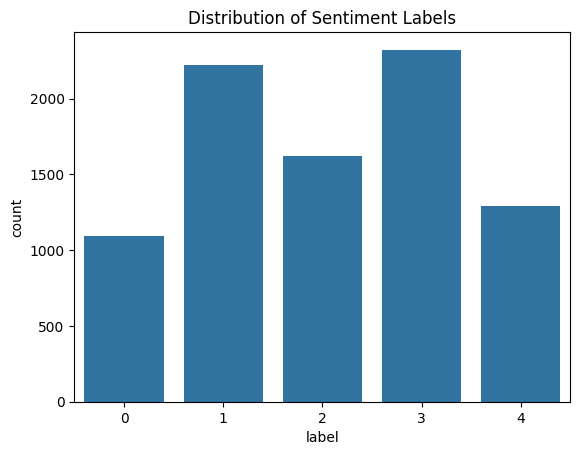

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Sentiment Labels')
plt.show()

In [9]:
print(train_data.isnull().sum())

text              0
label             0
input_ids         0
attention_mask    0
dtype: int64


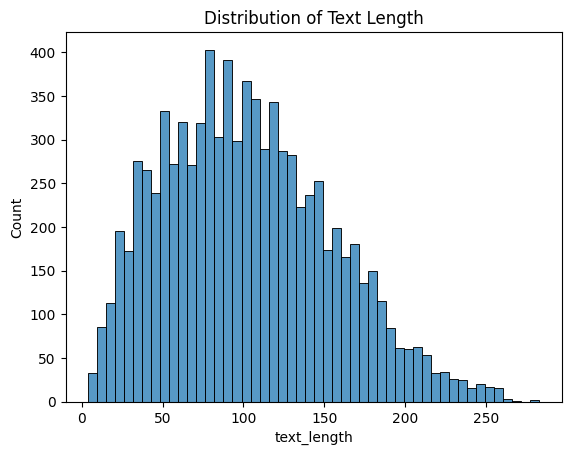

In [10]:
train_data['text_length'] = train_data['text'].apply(len)
sns.histplot(train_data['text_length'], bins=50)
plt.title('Distribution of Text Length')
plt.show()

In [5]:
from transformers import BertTokenizer
import torch

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to preprocess the text data
def preprocess_text(df, tokenizer, max_length=128):
    """
    Preprocesses the text data using the tokenizer.
    """
    # Tokenize the text and convert to token IDs
    encoded_data = tokenizer.batch_encode_plus(
        df['text'].tolist(),  # List of sentences
        padding=True,         # Pad sequences to the same length
        truncation=True,      # Truncate sequences longer than max_length
        max_length=max_length,  # Maximum sequence length
        return_tensors='pt'   # Return PyTorch tensors
    )
    
    # Add the token IDs and attention masks to the DataFrame
    df['input_ids'] = encoded_data['input_ids'].tolist()
    df['attention_mask'] = encoded_data['attention_mask'].tolist()
    
    return df

# Preprocess the train, dev, and test datasets
train_data = preprocess_text(train_data, tokenizer)
dev_data = preprocess_text(dev_data, tokenizer)
test_data = preprocess_text(test_data, tokenizer)

# Display the first few rows of the preprocessed train data
print("Preprocessed Train Data:")
print(train_data[['text', 'input_ids', 'attention_mask']].head())

c:\Users\Shree\Documents\AI_Repository\Sentiment Analysis With Stanford Tree\sentiment_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Preprocessed Train Data:
                                                text  \
0  The Rock is destined to be the 21st Century 's...   
1  The gorgeously elaborate continuation of `` Th...   
2  Singer\/composer Bryan Adams contributes a sle...   
3  You 'd think by now America would have had eno...   
4               Yet the act is still charming here .   

                                           input_ids  \
0  [101, 1996, 2600, 2003, 16036, 2000, 2022, 199...   
1  [101, 1996, 9882, 2135, 9603, 13633, 1997, 103...   
2  [101, 3220, 1032, 1013, 4543, 8527, 5922, 1660...   
3  [101, 2017, 1005, 1040, 2228, 2011, 2085, 2637...   
4  [101, 2664, 1996, 2552, 2003, 2145, 11951, 218...   

                                      attention_mask  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
4  [1, 1, 1, 1, 1, 1, 1, 1

In [6]:
# Save the preprocessed DataFrames
train_data.to_pickle('sst_data/train_preprocessed.pkl')
dev_data.to_pickle('sst_data/dev_preprocessed.pkl')
test_data.to_pickle('sst_data/test_preprocessed.pkl')

print("Preprocessed DataFrames saved.")

Preprocessed DataFrames saved.


In [7]:
from torch.utils.data import TensorDataset, DataLoader

# Convert the preprocessed data into PyTorch tensors
train_inputs = torch.tensor(train_data['input_ids'].tolist())
train_masks = torch.tensor(train_data['attention_mask'].tolist())
train_labels = torch.tensor(train_data['label'].tolist())

# Create TensorDatasets
train_dataset = TensorDataset(train_inputs, train_masks, train_labels)

# Create DataLoaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

print("DataLoaders created.")

DataLoaders created.


In [11]:
from transformers import BertForSequenceClassification, AdamW
from torch.nn import CrossEntropyLoss
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',  # Pre-trained BERT model
    num_labels=5          # Number of sentiment labels (0-4)
)

# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Set up the optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = CrossEntropyLoss()

# Training loop
epochs = 3  # Number of training epochs
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    model.train()
    total_loss = 0

    for batch in train_loader:
        # Move batch to GPU if available
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Calculate average loss for the epoch
    avg_loss = total_loss / len(train_loader)
    print(f"Training Loss: {avg_loss}")

# Save the trained model
model.save_pretrained('sst_sentiment_model')
tokenizer.save_pretrained('sst_sentiment_model')

print("Model saved.")

c:\Users\Shree\Documents\AI_Repository\Sentiment Analysis With Stanford Tree\sentiment_env\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Shree\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of BertForSequenceClassification were not initia

Epoch 1/3


KeyboardInterrupt: 